In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
print(sys.version)
print('-------------------')
import platform
print(platform.python_version())

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
-------------------
3.10.9


# Dataset

In [3]:
#"Parkinson_Multiple_Sound_Recording/train_data.txt"

data=pd.read_csv('Parkinson_Multiple_Sound_Recording/train_data.txt')

print(data.shape, '\n')

data.head()

t_data=pd.read_csv('Parkinson_Multiple_Sound_Recording/test_data.txt')

print('TEST DATA',t_data.shape, '\n')

t_data.head()



(1040, 29) 

TEST DATA (336, 28) 



,Subject id,Jitter (local),Jitter (local absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local dB),Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,class
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject id                           1040 non-null   int64  
 1   Jitter (local)                       1040 non-null   float64
 2   Jitter (local absolute)              1040 non-null   float64
 3   Jitter (rap)                         1040 non-null   float64
 4   Jitter (ppq5)                        1040 non-null   float64
 5   Jitter (ddp)                         1040 non-null   float64
 6   Shimmer (local)                      1040 non-null   float64
 7   Shimmer (local dB)                   1040 non-null   float64
 8   Shimmer (apq3)                       1040 non-null   float64
 9   Shimmer (apq5)                       1040 non-null   float64
 10   Shimmer (apq11)                     1040 non-null   float64
 11  Shimmer (dda)                 

In [5]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject id                           336 non-null    int64  
 1   Jitter (local)                       336 non-null    float64
 2   Jitter (local absolute)              336 non-null    float64
 3   Jitter (rap)                         336 non-null    float64
 4   Jitter (ppq5)                        336 non-null    float64
 5   Jitter (ddp)                         336 non-null    float64
 6   Shimmer (local)                      336 non-null    float64
 7   Shimmer (local dB)                   336 non-null    float64
 8   Shimmer (apq3)                       336 non-null    float64
 9   Shimmer (apq5)                       336 non-null    float64
 10   Shimmer (apq11)                     336 non-null    float64
 11  Shimmer (dda)                   

1    520
0    520
Name: class, dtype: int64

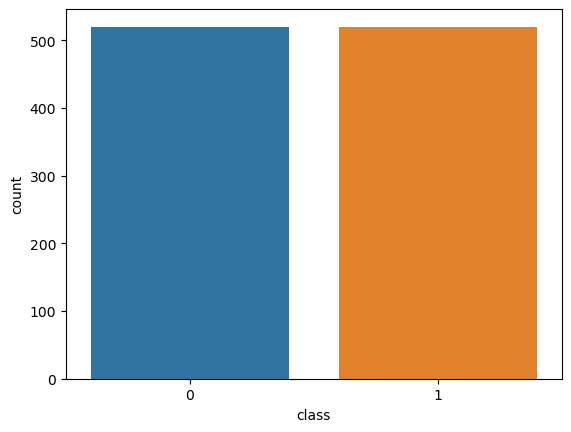

In [6]:
sns.countplot(x="class", data=data)
data['class'].value_counts()
#0 is healthy 1 is parkison affected

# Feature Elimination

### Recursive Feature Elimination

In [7]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Spliting the data into features and patient status and subID
updrs = data.drop('UPDRS', axis=1) 
w = data['Subject id'] # PD patient ID
X = data.drop(['Subject id', 'class','UPDRS'], axis=1)  # Features
y = data['class']  # PD or No

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the selected features
print(rfe.support_)

# Print the ranking of the features
print(rfe.ranking_)

# Selected features
rdata = X.loc[:, rfe.support_]


# print(rdata)

[ True False False False False False  True False False  True  True  True
  True False False False False False False  True  True  True False False
  True False]
[ 1 16 12  8  3  5  1 10  9  1  1  1  1  7 14 13 17 11 15  1  1  1  6  4
  1  2]


In [8]:
rdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jitter (local)          1040 non-null   float64
 1   Shimmer (local dB)      1040 non-null   float64
 2    Shimmer (apq11)        1040 non-null   float64
 3   Shimmer (dda)           1040 non-null   float64
 4   AC                      1040 non-null   float64
 5   NTH                     1040 non-null   float64
 6   Number of pulses        1040 non-null   int64  
 7   Number of periods       1040 non-null   int64  
 8   Mean period             1040 non-null   float64
 9   Number of voice breaks  1040 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 81.4 KB


In [9]:
rdata.insert(10, "class", y)
rdata.insert(0, "Subject id", w)
# rdata

In [10]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Subject id              1040 non-null   int64  
 1   Jitter (local)          1040 non-null   float64
 2   Shimmer (local dB)      1040 non-null   float64
 3    Shimmer (apq11)        1040 non-null   float64
 4   Shimmer (dda)           1040 non-null   float64
 5   AC                      1040 non-null   float64
 6   NTH                     1040 non-null   float64
 7   Number of pulses        1040 non-null   int64  
 8   Number of periods       1040 non-null   int64  
 9   Mean period             1040 non-null   float64
 10  Number of voice breaks  1040 non-null   int64  
 11  class                   1040 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 97.6 KB


In [11]:

t_data
# td_c=['Subject id','Jitter (local)','Shimmer (local dB)',' Shimmer (apq11)','Shimmer (dda)','AC','NTH','Number of pulses','Number of periods','Mean period','Number of voice breaks','class']

td_c=list(rdata.columns)

print(td_c)
print(type(td_c))

td=t_data.loc[:,td_c]

['Subject id', 'Jitter (local)', 'Shimmer (local dB)', ' Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'Number of pulses', 'Number of periods', 'Mean period', 'Number of voice breaks', 'class']
<class 'list'>


#### SVM

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

X = rdata.drop(['class'], axis=1)  # Features
y = rdata['class'] 

tX = td.drop(['class'], axis=1)  # Features
ty = td['class']

In [13]:
# from sklearn.model_selection import train_test_split


from sklearn.svm import SVC

 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM object with the RBF kernel
svm = SVC(kernel='rbf')

# Fit the SVM to the training data
svm.fit(X, y)

# Use the SVM to predict labels for the test data
y_pred = svm.predict(tX)

# print(y_pred)

# print(y_test)
accuracy = svm.score(tX, ty)

print(f'Test accuracy: {accuracy*100} %')

precision = precision_score(ty, y_pred)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, y_pred)
print("F1 Score:",  f1*100,'%')

#  recall
recall = recall_score(ty, y_pred)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, y_pred)
print("Confusion Matrix:\n", conf_matrix*100,)


Test accuracy: 72.02380952380952 %
Precision: 100.0 %
F1 Score: 83.73702422145328 %
Recall: 72.02380952380952 %
Confusion Matrix:
 [[    0     0]
 [ 9400 24200]]


#### XgBoost

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [15]:
import xgboost as xgb


# DMatrix
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(tX, label=ty)

# XGBoost model
param = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

num_round = 20
bst = xgb.train(param, dtrain, num_round)

# testing
predictions = bst.predict(dtest)

# print(predictions)
# print(y_test)
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recallsd
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)


Accuracy: 71.42857142857143 %
Precision: 100.0 %
F1 Score: 83.33333333333333 %
Recall: 71.42857142857143 %
Confusion Matrix:
 [[    0     0]
 [ 9600 24000]]


#### Ensemble

In [16]:
from sklearn.ensemble import VotingClassifier


# Using the trained svm kernal

# # Train an XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X, y)

# Combine the classifiers into an ensemble
ensemble = VotingClassifier(estimators=[('svm', svm), ('xgb', xgb_clf)], voting='hard')
ensemble.fit(X, y)

# Make predictions on the test set
predictions = ensemble.predict(tX)

# Evaluate the model
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)

Accuracy: 70.83333333333334 %
Precision: 100.0 %
F1 Score: 82.92682926829268 %
Recall: 70.83333333333334 %
Confusion Matrix:
 [[    0     0]
 [ 9800 23800]]


### Principal Component Analysis on RFE Data

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)


In [18]:
type(X_pca)

numpy.ndarray

In [19]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Scatter Plot')
# plt.colorbar()
# plt.show()




In [20]:
# corr_matrix = np.corrcoef(X_pca, rowvar=False)
# plt.imshow(corr_matrix, cmap="YlGnBu")
# plt.colorbar()
# plt.show()


In [21]:
X_test_scaled = scaler.transform(tX)
tX_pca = pca.transform(X_test_scaled)


#### SVM

In [22]:
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# X = rdata.drop(['class'], axis=1)  # Features
# y = rdata['class'] 

# tX = td.drop(['class'], axis=1)  # Features
# ty = td['class'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM object with the RBF kernel
svm = SVC(kernel='rbf')

# Fit the SVM to the training data
svm.fit(X_pca, y)

# Use the SVM to predict labels for the test data
y_pred = svm.predict(tX_pca)

# print(y_pred)

# print(y_test)
accuracy = svm.score(tX_pca, ty)

print(f'Test accuracy: {accuracy*100}%')

precision = precision_score(ty, y_pred)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, y_pred)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, y_pred)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, y_pred)
print("Confusion Matrix:\n", conf_matrix*100,)

Test accuracy: 68.45238095238095%
Precision: 100.0 %
F1 Score: 81.2720848056537 %
Recall: 68.45238095238095 %
Confusion Matrix:
 [[    0     0]
 [10600 23000]]


#### XgBoost

In [93]:
import xgboost as xgb


# DMatrix
dtrain = xgb.DMatrix(X_pca, label=y)
dtest = xgb.DMatrix(tX_pca, label=ty)

# XGBoost model
param = {
    'max_depth': 7,
    'eta': 0.6,
    'objective': 'multi:softmax',
    'num_class': 3
}

num_round = 5
bst = xgb.train(param, dtrain, num_round)

# testing
predictions = bst.predict(dtest)

# print(predictions)
# print(y_test)
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)

Accuracy: 66.66666666666666 %
Precision: 100.0 %
F1 Score: 80.0 %
Recall: 66.66666666666666 %
Confusion Matrix:
 [[    0     0]
 [11200 22400]]


#### Ensemble

In [24]:
from sklearn.ensemble import VotingClassifier


# Using the trained svm kernal

# # Train an XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_pca, y)

# Combine the classifiers into an ensemble
ensemble = VotingClassifier(estimators=[('svm', svm), ('xgb', xgb_clf)], voting='hard')
ensemble.fit(X_pca, y)

# Make predictions on the test set
predictions = ensemble.predict(tX_pca)

# Evaluate the model
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)

Accuracy: 64.28571428571429 %
Precision: 100.0 %
F1 Score: 78.26086956521739 %
Recall: 64.28571428571429 %
Confusion Matrix:
 [[    0     0]
 [12000 21600]]


## PCA on Orginal Dataset


In [94]:
w = data['Subject id'] # PD patient ID
X = data.drop(['Subject id','class','UPDRS'], axis=1)  # Features
y = data['class']  # PD or No

tX=t_data.drop(['Subject id','class'], axis=1)
ty=t_data['class']

ty.info()

<class 'pandas.core.series.Series'>
RangeIndex: 336 entries, 0 to 335
Series name: class
Non-Null Count  Dtype
--------------  -----
336 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# X = data.drop(['class'], axis=1)  # Features
# y = data['class'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)



In [96]:
# corr_matrix = np.corrcoef(X_pca, rowvar=False)
# plt.imshow(corr_matrix, cmap="YlGnBu")
# plt.colorbar()
# plt.show()

In [97]:
X_test_scaled = scaler.transform(tX)
tX_pca = pca.transform(X_test_scaled)


In [98]:
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# X = rdata.drop(['class'], axis=1)  # Features
# y = rdata['class'] 

# tX = td.drop(['class'], axis=1)  # Features
# ty = td['class'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM object with the RBF kernel
svm = SVC(kernel='linear')

# Fit the SVM to the training data
svm.fit(X_pca, y)

# Use the SVM to predict labels for the test data
y_pred = svm.predict(tX_pca)

# print(y_pred)

# print(y_test)
accuracy = svm.score(tX_pca, ty)

print(f'Test accuracy: {accuracy*100}%')

precision = precision_score(ty, y_pred)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, y_pred)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, y_pred)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, y_pred)
print("Confusion Matrix:\n", conf_matrix*100,)

Test accuracy: 63.69047619047619%
Precision: 100.0 %
F1 Score: 77.81818181818181 %
Recall: 63.69047619047619 %
Confusion Matrix:
 [[    0     0]
 [12200 21400]]


In [108]:
import xgboost as xgb


# DMatrix
dtrain = xgb.DMatrix(X_pca, label=y)
dtest = xgb.DMatrix(tX_pca, label=ty)

# XGBoost model
param = {
    'max_depth': 7,
    'eta': 0.6,
    'objective': 'multi:softmax',
    'num_class': 3
}

num_round = 5
bst = xgb.train(param, dtrain, num_round)

# testing
predictions = bst.predict(dtest)

# print(predictions)
# print(y_test)
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)

Accuracy: 66.66666666666666 %
Precision: 100.0 %
F1 Score: 80.0 %
Recall: 66.66666666666666 %
Confusion Matrix:
 [[    0     0]
 [11200 22400]]


In [124]:
from sklearn.ensemble import VotingClassifier


# Using the trained svm kernal

# # Train an XGBoost classifier

param = {
    'max_depth': 12,
    'eta': 0.9,
    'objective': 'multi:softmax',
    'num_class': 8
}

xgb_clf = xgb.XGBClassifier(**param)
xgb_clf.fit(X_pca, y)

# Combine the classifiers into an ensemble
ensemble = VotingClassifier(estimators=[('svm', svm), ('xgb', xgb_clf)], voting='hard')
ensemble.fit(X_pca, y)

# Make predictions on the test set
predictions = ensemble.predict(tX_pca)

# predictions=xgb_clf.predict(tX_pca)

# Evaluate the model
accuracy = sum(predictions == ty) / len(ty)
print("Accuracy:", accuracy*100,'%')

precision = precision_score(ty, predictions)
print("Precision:", precision*100,'%')

f1 = f1_score(ty, predictions)
print("F1 Score:",  f1*100,'%')

# Calculate the recall
recall = recall_score(ty, predictions)
print("Recall:", recall*100,'%')

# confusion matrix
conf_matrix = confusion_matrix(ty, predictions)
print("Confusion Matrix:\n", conf_matrix*100,)

Accuracy: 47.023809523809526 %
Precision: 100.0 %
F1 Score: 63.967611336032384 %
Recall: 47.023809523809526 %
Confusion Matrix:
 [[    0     0]
 [17800 15800]]


### L1 regularization

In [107]:
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler

In [86]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [87]:
# # create a CNN model
# model = Sequential()

# # add the first convolutional layer
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# # add the max pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # add the second convolutional layer
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # add another max pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # flatten the output of the convolutional layers
# model.add(Flatten())

# # add a fully connected layer with 128 neurons
# model.add(Dense(128, activation='relu'))

# # add an output layer with a softmax activation function
# model.add(Dense(10, activation='softmax'))


Metal device set to: Apple M2


2023-02-23 23:29:47.675362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-23 23:29:47.675424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [92]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [99]:

# images = X.values.astype('float32')
# images = images.reshape(images.shape[0], 100, 100, 1)

# images /= 255


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10


ValueError: in user code:

    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ikp/miniconda3/envs/PD_MRI/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 11)
